<a href="https://colab.research.google.com/github/ramachandra17/ramachandra17/blob/main/ML_End2End_Pipeline_NewFeature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import random as rnd

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

# Importing Models
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Importing other tools
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, classification_report, make_scorer
from sklearn.metrics import accuracy_score, recall_score, precision_recall_curve
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/Mineria/Titanic/master/csv/train.csv")

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Basic Preproccesing

In [ ]:
# %%writefile pre-proces.py
# Drop Ticket & Cabin 
def preprocess(data):
	data = data.drop(['Ticket', 'Cabin'], axis=1)

	# Get the title from name
	data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
	data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
		'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
	data['Title'] = data['Title'].replace('Mlle', 'Miss')
	data['Title'] = data['Title'].replace('Ms', 'Miss')
	data['Title'] = data['Title'].replace('Mme', 'Mrs')

	title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5} 

	data['Title'] = data['Title'].map(title_mapping)
	data = data.drop(['Name', 'PassengerId'], axis=1)

	#Change Sex to Numeric
	data['Sex'] = data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

	#Add Family Size 
	data['FamilySize'] = data['SibSp'] + data['Parch'] + 1  # gives the number of people per ticket 
	data['IsAlone'] = 0
	data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1
	data = data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)

	#Imputing Missing Value 
	data['Age'].fillna(data['Age'].dropna().median(), inplace=True)
	data['Embarked'].fillna(data['Embarked'].dropna().mode()[0], inplace=True)

	# Categorizing Numerical Value 
	data['FareBand'] = pd.qcut(data['Fare'], 4).astype(str)
	data['AgeBand'] = pd.qcut(data['Age'], 4).astype(str)
	# data = data.drop(['Fare', 'Age'], axis=1)

	# Converting Embark to Number
	data['Embarked'] = data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

	data['FareBand'] = data['FareBand'].map( {'(-0.001, 7.91]': 0, '(31.0, 512.329]': 3, '(7.91, 14.454]': 1, '(14.454, 31.0]':2 } ).astype(int)
	data['AgeBand'] = data['AgeBand'].map( {'(0.419, 22.0]': 0, '(35.0, 80.0]': 3, '(22.0, 28.0]': 1, '(28.0, 35.0]':2 } ).astype(int)
return data

SyntaxError: ignored

In [ ]:
data = data.drop(['Ticket', 'Cabin'], axis=1)

# Get the title from name
data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5} 

data['Title'] = data['Title'].map(title_mapping)
data = data.drop(['Name', 'PassengerId'], axis=1)

#Change Sex to Numeric
data['Sex'] = data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

#Add Family Size 
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1  # gives the number of people per ticket 
data['IsAlone'] = 0
data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1
data = data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)

#Imputing Missing Value 
data['Age'].fillna(data['Age'].dropna().median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].dropna().mode()[0], inplace=True)

# Categorizing Numerical Value 
data['FareBand'] = pd.qcut(data['Fare'], 4).astype(str)
data['AgeBand'] = pd.qcut(data['Age'], 4).astype(str)
# data = data.drop(['Fare', 'Age'], axis=1)

# Converting Embark to Number
data['Embarked'] = data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

data['FareBand'] = data['FareBand'].map( {'(-0.001, 7.91]': 0, '(31.0, 512.329]': 3, '(7.91, 14.454]': 1, '(14.454, 31.0]':2 } ).astype(int)
data['AgeBand'] = data['AgeBand'].map( {'(0.419, 22.0]': 0, '(35.0, 80.0]': 3, '(22.0, 28.0]': 1, '(28.0, 35.0]':2 } ).astype(int)

In [ ]:
data.head()

,Survived,Pclass,Sex,Embarked,Title,IsAlone,FareBand,AgeBand
0,0,3,0,0,1,0,0,0
1,1,1,1,1,3,0,3,3
2,1,3,1,0,2,1,1,1
3,1,1,1,0,3,0,3,2
4,0,3,0,0,1,1,1,2


In [ ]:
data.drop(['Age','Fare'],axis=1,inplace=True)

#GridSearch 

In [ ]:
# Change in the cateogry Type & Data Columns to make it dummy
dataDump  = data.copy()
df = dataDump.drop(['Survived'], axis=1)
df2 = df.drop([],axis = 1)
df3 = pd.DataFrame()
for col in df.columns:
    df3[col] = df[col].astype('category')
  

In [ ]:
Target = ['Survived']
data1_x_bin = pd.concat([pd.get_dummies(df3)],axis=1)

In [ ]:
data1_x_bin

,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2,Title_1,Title_2,Title_3,Title_4,Title_5,IsAlone_0,IsAlone_1,FareBand_0,FareBand_1,FareBand_2,FareBand_3,AgeBand_0,AgeBand_1,AgeBand_2,AgeBand_3
0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0
1,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
2,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
3,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
4,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0
887,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0
888,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0
889,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0


In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Simple Block to experiment all available Algorithm (Major One's, not exhustive) without setting any parameter

### BaseLine Model Selection 

In [ ]:
# Model Training
# model.fit(X_train)

##Train = accuracy(model.predict(X_Train) , Y_Train)  #redfitting X_train?

#Test Accuracy 
#Test = accuracy(model.predict(X_Test),Y_Test)

#
#If, Test >> Train ; Overfit 
#If, Test << Train; Underfit #

#
#STD (Predicted Vaue, Actual Value) ~ same ;   Low Bias 
#STD (Predicted Vaue, Actual Value) ~ high difference ;  High Bias 

#Variance ( Predicted Vaue, Actual Value ) ~ same ; Low Variance 
#Variance ( Predicted Vaue, Actual Value ) ~ High Difference ; High Variance 

# can you judge the Variance & Bias by using single MOdel?
 #-- Ideally, you should have bunch of different model, to comment on Boas and vairance 

In [ ]:
Target = ['Survived']


# X = data1_x_bin
# y = Target
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]

#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .7 ) # run model 10x with 60/30 split intentionally leaving out 10%
#random_state = 0 
#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = data[Target]  # Y 

#index through MLA and save performance to table
row_index = 0
Feature_Importance = {}

for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, data1_x_bin, data[Target], cv  = cv_split,return_train_score=True,scoring='f1')

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(data1_x_bin, data[Target])

    try:
      Feature_Importance[MLA_name] = alg.feature_importances_
    except AttributeError:
      pass
      
    MLA_predict[MLA_name] = alg.predict(data1_x_bin)
    
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
MLA_compare['Difference'] = (MLA_compare['MLA Test Accuracy Mean']-MLA_compare['MLA Train Accuracy Mean'])*100
MLA_compare.sort_values(by='Difference',ascending=False)

#MLA_predict


# To select the final baseline, run this block of code - without random state ~ 5 time and then pick the consistent Algo;

# as a first step, run the model pipeline and select the best model 
    # check the selected model, without random state atleast ~ 5 times; just to be sure, if it's behaving normally 

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time,Difference
11,BernoulliNB,"{'alpha': 1.0, 'binarize': 0.0, 'class_prior':...",0.732083,0.74945,0.064419,0.00479832,1.73675
14,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.724298,0.729413,0.126618,0.0735278,0.511479
16,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.759587,0.756146,0.0661826,0.0147089,-0.344147
15,NuSVC,"{'cache_size': 200, 'class_weight': None, 'coe...",0.716124,0.709658,0.0767887,0.0937184,-0.646626
12,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.740733,0.733512,0.0600809,0.00319777,-0.72211
8,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.75953,0.752069,0.0776452,0.0123311,-0.74617
9,SGDClassifier,"{'alpha': 0.0001, 'average': False, 'class_wei...",0.712304,0.699991,0.147365,0.00844426,-1.23133
19,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.757288,0.744648,0.123265,0.00858364,-1.26393
20,QuadraticDiscriminantAnalysis,"{'priors': None, 'reg_param': 0.0, 'store_cova...",0.414783,0.401353,0.66209,0.00576565,-1.343
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.752743,0.730542,0.0626963,0.067406,-2.22007


In [ ]:
MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time,Difference
19,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.754845,0.754274,0.0875661,0.00580742,-0.0571005
8,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.754549,0.745596,0.0714458,0.00785422,-0.895317
16,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.761147,0.744002,0.0749696,0.0107599,-1.71454
12,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.739047,0.734835,0.0943053,0.00312731,-0.421228
21,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.783963,0.733927,0.0868922,0.0994028,-5.00353
11,BernoulliNB,"{'alpha': 1.0, 'binarize': 0.0, 'class_prior':...",0.740148,0.732982,0.113649,0.00313222,-0.716582
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': 'warn',...",0.75407,0.732501,0.135109,0.164882,-2.15687
13,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.775396,0.731152,0.0395978,0.00285535,-4.42441
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.78872,0.728718,0.0986461,0.079415,-6.00022
14,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.723703,0.723324,0.0550463,0.067722,-0.0379493


In [ ]:
#@title Example form fields
#@markdown Forms support many types of fields.

no_type_checking = ''  #@param
string_type = 'example'  #@param {type: "string"}
slider_value = 164  #@param {type: "slider", min: 100, max: 200}
number = 102  #@param {type: "number"}
date = '2010-11-05'  #@param {type: "date"}
pick_me = "monday"  #@param ['monday', 'tuesday', 'wednesday', 'thursday']
select_or_input = "apples" #@param ["apples", "bananas", "oranges"] {allow-input: true}
#@markdown ---


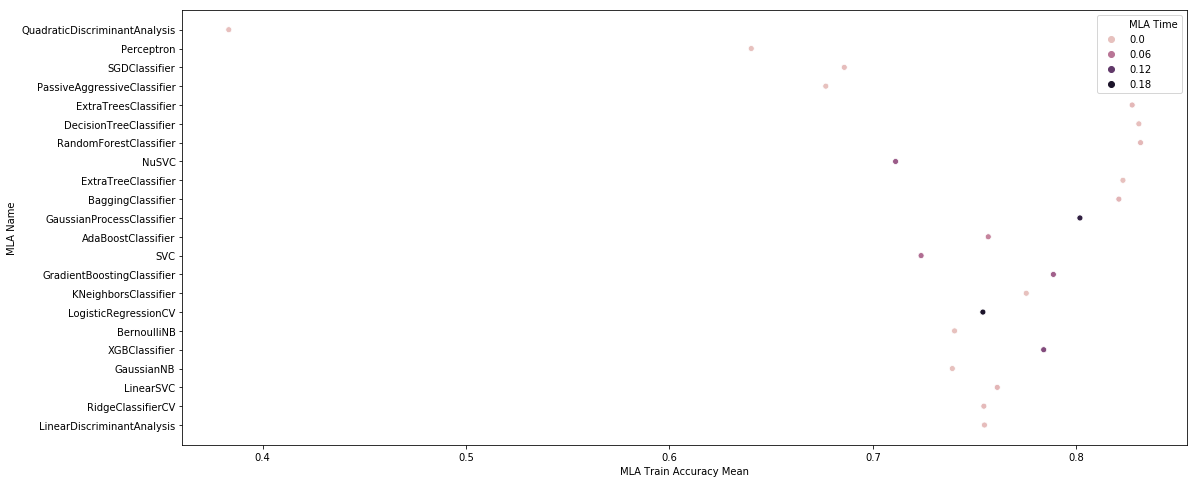

In [ ]:
# sns.lineplot(x="MLA Train Accuracy Mean", y="MLA Test Accuracy Mean", hue="MLA Name", data=MLA_compare)
from matplotlib import pyplot as plt
plt.figure(figsize=(18,8))
cmap = sns.cubehelix_palette(dark=.1, light=0.8, as_cmap=True)
# cmap = sns.palplot(sns.hls_palette(8, l=.3, s=.8))
sns.scatterplot(x="MLA Train Accuracy Mean", y="MLA Name", data=MLA_compare,hue="MLA Time",palette=cmap ,sizes=(20, 200))

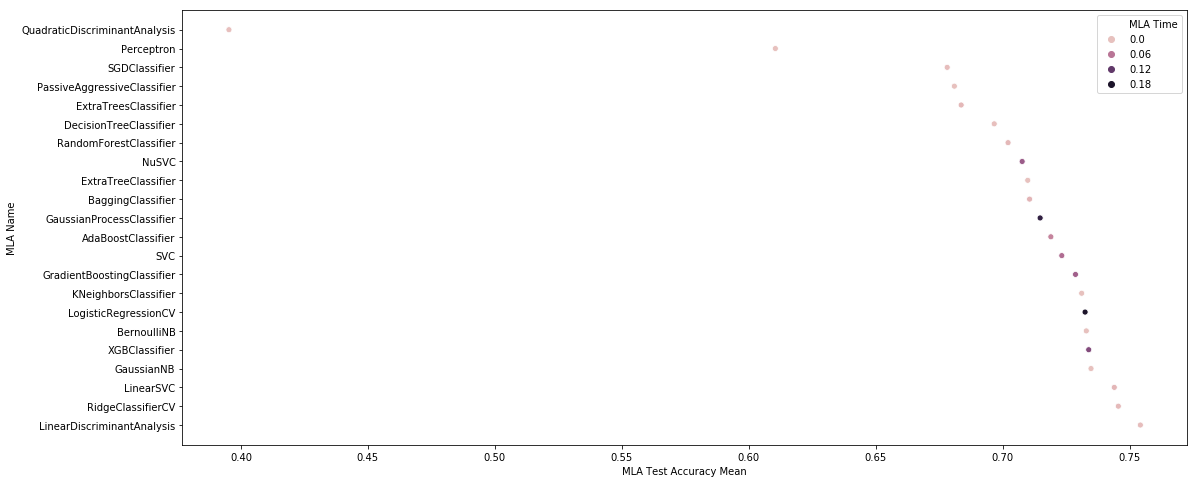

In [ ]:
# sns.lineplot(x="MLA Train Accuracy Mean", y="MLA Test Accuracy Mean", hue="MLA Name", data=MLA_compare)
from matplotlib import pyplot as plt
plt.figure(figsize=(18,8))
cmap = sns.cubehelix_palette(dark=.1, light=0.8, as_cmap=True)
# cmap = sns.palplot(sns.hls_palette(8, l=.3, s=.8))
sns.scatterplot(x="MLA Test Accuracy Mean", y="MLA Name", data=MLA_compare,hue="MLA Time",palette=cmap ,sizes=(20, 200))

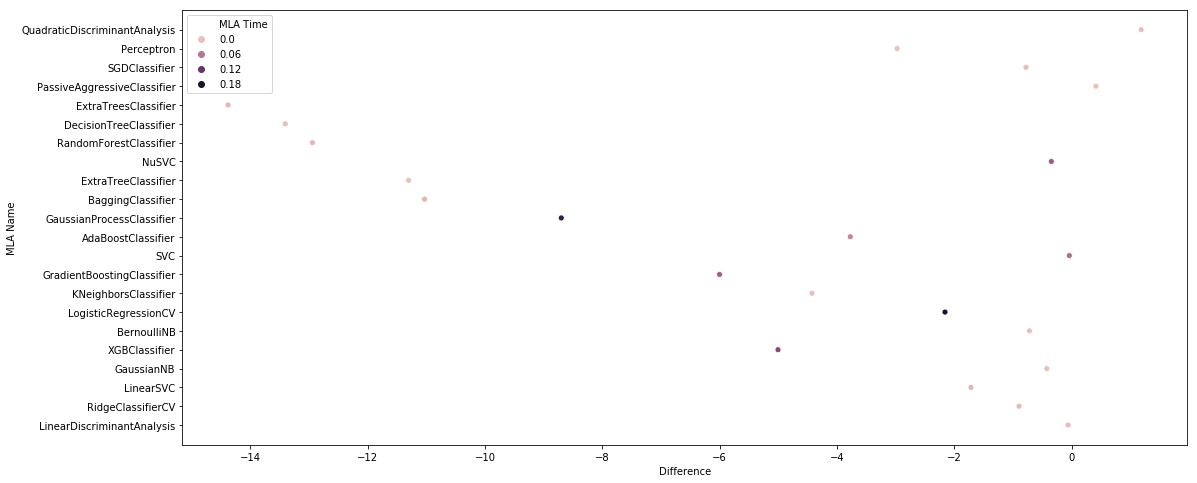

In [ ]:
# sns.lineplot(x="MLA Train Accuracy Mean", y="MLA Test Accuracy Mean", hue="MLA Name", data=MLA_compare)
from matplotlib import pyplot as plt
plt.figure(figsize=(18,8))
cmap = sns.cubehelix_palette(dark=.1, light=0.8, as_cmap=True)
# cmap = sns.palplot(sns.hls_palette(8, l=.3, s=.8))
sns.scatterplot(x="Difference", y="MLA Name", data=MLA_compare,hue="MLA Time",palette=cmap ,sizes=(20, 200))

In [ ]:
Feature_Importance

{'AdaBoostClassifier': array([0.06, 0.02, 0.02, 0.06, 0.1 , 0.04, 0.  , 0.04, 0.08, 0.1 , 0.06,
        0.06, 0.04, 0.06, 0.02, 0.04, 0.02, 0.02, 0.02, 0.04, 0.02, 0.04,
        0.04]),
 'DecisionTreeClassifier': array([4.81368984e-02, 1.89120338e-02, 1.12700133e-01, 6.23019830e-03,
        6.23269137e-06, 2.36091623e-02, 1.61761482e-02, 4.74518289e-03,
        4.84883666e-01, 2.07253832e-02, 2.27887824e-03, 4.06870093e-03,
        5.63283990e-02, 1.47822191e-02, 3.12091908e-02, 6.18189269e-03,
        1.66497450e-02, 1.66238435e-02, 4.37432836e-02, 2.07124296e-02,
        2.37918629e-02, 7.10373506e-03, 2.04007812e-02]),
 'ExtraTreeClassifier': array([6.70040340e-02, 4.52746796e-02, 5.88596633e-02, 0.00000000e+00,
        2.98830123e-01, 4.11233844e-02, 7.24878906e-03, 1.29471421e-02,
        4.60760520e-02, 1.81097986e-01, 1.15704968e-05, 0.00000000e+00,
        1.14397283e-03, 1.82783816e-02, 1.91881737e-02, 1.13755080e-02,
        5.98460376e-03, 3.97521640e-02, 3.65069586e-02, 2.6

In [ ]:
data1_x_bin.columns

Index(['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_0', 'Sex_1', 'Embarked_0',
       'Embarked_1', 'Embarked_2', 'Title_1', 'Title_2', 'Title_3', 'Title_4',
       'Title_5', 'IsAlone_0', 'IsAlone_1', 'FareBand_0', 'FareBand_1',
       'FareBand_2', 'FareBand_3', 'AgeBand_0', 'AgeBand_1', 'AgeBand_2',
       'AgeBand_3'],
      dtype='object')

In [ ]:
# Get Importance Feature 

feature_names = data1_x_bin.columns
feat_imp_df = pd.DataFrame.from_dict(Feature_Importance)
feat_imp_df.index = feature_names
feat_imp_df

,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier,DecisionTreeClassifier,ExtraTreeClassifier,XGBClassifier
Pclass_1,0.06,0.053296,0.048118,0.042390,0.048137,0.067004,0.039966
Pclass_2,0.02,0.029473,0.002734,0.029402,0.018912,0.045275,0.011203
Pclass_3,0.02,0.109214,0.143863,0.097491,0.112700,0.058860,0.123702
Sex_0,0.06,0.075351,0.102749,0.196674,0.006230,0.000000,0.167462
Sex_1,0.10,0.089995,0.055669,0.006391,0.000006,0.298830,0.000000
Embarked_0,0.04,0.035162,0.025331,0.032416,0.023609,0.041123,0.021709
Embarked_1,0.00,0.018799,0.009108,0.023339,0.016176,0.007249,0.014387
Embarked_2,0.04,0.012417,0.013584,0.014314,0.004745,0.012947,0.008884
Title_1,0.08,0.233560,0.418585,0.224494,0.484884,0.046076,0.411140
Title_2,0.10,0.042557,0.000573,0.035299,0.020725,0.181098,0.003464


In [ ]:
feat_imp_df.sort_values(by="DecisionTreeClassifier",ascending=False)['DecisionTreeClassifier'][:5]

Title_1       0.484884
Pclass_3      0.112700
Title_5       0.056328
Pclass_1      0.048137
FareBand_3    0.043743
Name: DecisionTreeClassifier, dtype: float64

In [ ]:
feat_imp_df.sort_values(by="RandomForestClassifier",ascending=False)['RandomForestClassifier'][:5]

Title_1     0.224494
Sex_0       0.196674
Pclass_3    0.097491
Pclass_1    0.042390
Title_2     0.035299
Name: RandomForestClassifier, dtype: float64

          AdaBoostClassifier  ExtraTreesClassifier  ...  XGBClassifier   Overall
Pclass_1                 0.6              0.211338  ...       0.097208  1.510826
Pclass_2                 0.2              0.107113  ...       0.027249  0.635536
Pclass_3                 0.2              0.455983  ...       0.300875  2.146724
Sex_0                    0.6              0.307832  ...       0.407311  2.444861
Sex_1                    1.0              0.371901  ...       0.000000  2.503707

[5 rows x 8 columns]


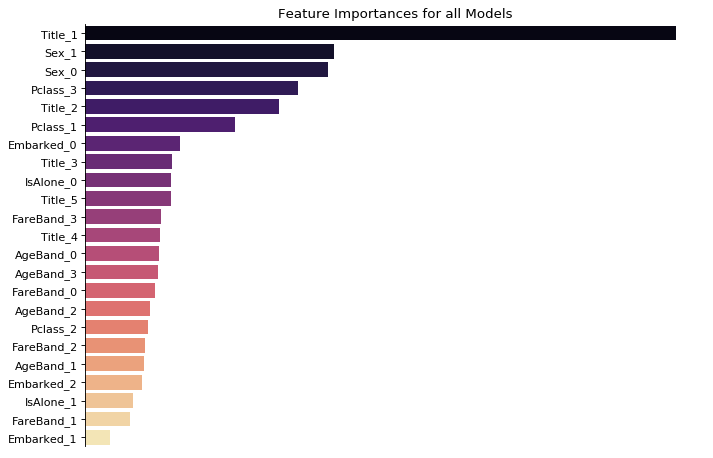

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

scaled_fi = pd.DataFrame(data=mms.fit_transform(feat_imp_df),
                         columns=feat_imp_df.columns,
                         index=feat_imp_df.index)

scaled_fi['Overall'] = scaled_fi.sum(axis=1)
print(scaled_fi.head())
ordered_ranking = scaled_fi.sort_values('Overall', ascending=False)
fig, ax = plt.subplots(figsize=(10,7), dpi=80)
sns.barplot(data=ordered_ranking, y=ordered_ranking.index, x='Overall', palette='magma')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_visible(False)
ax.grid(False)
ax.set_title('Feature Importances for all Models');

In [ ]:
#scaled_sorted[:5].index

NameError: ignored

In [ ]:
data1_x_bin.columns

Index(['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_0', 'Sex_1', 'Embarked_0',
       'Embarked_1', 'Embarked_2', 'Title_1', 'Title_2', 'Title_3', 'Title_4',
       'Title_5', 'IsAlone_0', 'IsAlone_1', 'FareBand_0', 'FareBand_1',
       'FareBand_2', 'FareBand_3', 'AgeBand_0', 'AgeBand_1', 'AgeBand_2',
       'AgeBand_3'],
      dtype='object')

In [ ]:
important_col

In [ ]:
# Re-Building the model with only top 10 Features 

scaled_sorted = scaled_fi.sort_values(by = ['Overall'], ascending = False)
scaled_sorted[:5].index
important_col = list(scaled_sorted[:5].index)
Target = ['Survived']
# data1_x_bin = pd.get_dummies(df2)
data1_x_bin = data1_x_bin[important_col]

# X = data1_x_bin
# y = Target
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]

#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .7, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = data[Target]

#index through MLA and save performance to table
row_index = 0
Feature_Importance = {}

for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, data1_x_bin, data[Target], cv  = cv_split,return_train_score=True,scoring='f1')

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(data1_x_bin, data[Target])

    try:
      Feature_Importance[MLA_name] = alg.feature_importances_
    except AttributeError:
      pass
      
    MLA_predict[MLA_name] = alg.predict(data1_x_bin)
    
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
MLA_compare['Difference'] = (MLA_compare['MLA Test Accuracy Mean']-MLA_compare['MLA Train Accuracy Mean'])*100
MLA_compare

## Running the Model through Grid Search 

In [ ]:
# Helper Class for Initilizing GridSearch

import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV

class EstimatorSelectionHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}
        self.best_params = {}
        self.feature_importance = {}
        self.FeatureImportanceAlgo = ['DecisionTreeClassifier','RandomForestClassifier','ExtraTreesClassifier','GradientBoostingClassifier']

    def fit(self, X, y, cv=3, n_jobs=-1, verbose=1, scoring='f1', refit=True):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, refit=refit,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs  
            self.best_params[key]  = str(gs.best_params_)
            if key in self.FeatureImportanceAlgo:
              self.feature_importance[key]= gs.best_estimator_ .feature_importances_

            # print (gs.best_params_.feature_importances_ )
            # try:
            #   print(gs.best_params_.feature_importances_ )
            #   self.feature_importance[key]= gs.best_params_.feature_importances_ 
            # except AttributeError:
            #   pass

    def returnBestParamDF(self):
      d = self.best_params
      BestParamDF = pd.DataFrame.from_dict([d.keys(), d.values()]).T
      return BestParamDF

    # def Feature_Importance(self):
    #   for each

    # def returnFeatureImportance(self):


    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC

models1 = {
    
    # the way to choose these models - can be selected from your previous baseline method;
    # another way could be that - you choose the models; 
    
    'LogisticRegression':LogisticRegression(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'KNNClassifier': KNeighborsClassifier(),
    'SVC': SVC(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    # 'AdaBoostClassfier':AdaBoostClassifier()
    
}

params1 = {
    'LogisticRegression': { "C":np.logspace(-3,3,7), "penalty":["l1","l2"] },  # l1 lasso l2 ridge
    'DecisionTreeClassifier': {'criterion' : ['gini', 'entropy'], 'splitter' : ['random', 'best'], 'max_depth':[2,5,10], 'min_samples_leaf':[2,5,10]},
    'RandomForestClassifier': { 'n_estimators': [16, 32] },
    'ExtraTreesClassifier': { 'n_estimators': [16, 32] },
    'KNNClassifier':{ 'n_neighbors': [5,10,15,20], 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']},
    'AdaBoostClassifier':  { 'n_estimators': [16, 32] },
    'GradientBoostingClassifier': { 'n_estimators': [16, 32], 'learning_rate': [0.8, 1.0] },
    'SVC': [
        {'kernel': ['linear'], 'C': [1, 10]},
        {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]},
    ]
}

In [ ]:
models1['DecisionTreeClassifier']

In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {
    'kernel':('linear', 'rbf'), 
    'C':[1, 10]
    
    }
svc = svm.SVC()

# svc.fit(X,y)
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(iris.data, iris.target)

In [ ]:
helper1 = EstimatorSelectionHelper(models1, params1)
helper1.fit(data1_x_bin, data[Target], scoring='f1', n_jobs=-1)

# To run with important column
# ImpCol = ['','']
# helper1.fit(data1_x_bin[ImpCol], data[Target], scoring='f1', n_jobs=-1)

In [ ]:
helper1.score_summary(sort_by='mean_score')

In [ ]:
helper1.grid_searches['DecisionTreeClassifier']

In [ ]:
feature_names = data1_x_bin.columns
feat_imp_df = pd.DataFrame.from_dict(helper1.feature_importance)
feat_imp_df.index = feature_names
feat_imp_df

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

scaled_fi = pd.DataFrame(data=mms.fit_transform(feat_imp_df),
                         columns=feat_imp_df.columns,
                         index=feat_imp_df.index)

scaled_fi['Overall'] = scaled_fi.sum(axis=1)
print(scaled_fi.head())
ordered_ranking = scaled_fi.sort_values('Overall', ascending=False)
fig, ax = plt.subplots(figsize=(10,7), dpi=80)
sns.barplot(data=ordered_ranking, y=ordered_ranking.index, x='Overall', palette='magma')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_visible(False)
ax.grid(False)
ax.set_title('Feature Importances for all Models');

In [ ]:
helper1.score_summary(sort_by='max_score')

In [ ]:
helper1.returnBestParamDF()

In [ ]:
# Get best 

#Stacking

## Voting Classifier  - Soft & Hard Voting

In [ ]:
vote_est = [
    #Ensemble Methods: http://scikit-learn.org/stable/modules/ensemble.html
    
    ('rfc', ensemble.RandomForestClassifier()),
    
    #Nearest Neighbor: http://scikit-learn.org/stable/modules/neighbors.html
    ('knn', neighbors.KNeighborsClassifier()),
    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
   ('xgb', XGBClassifier()),
   ('lgbm',LGBMClassifier())

]

seed = 123
skf = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = seed )
#Hard Vote or majority rules
vote_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
vote_hard_cv = model_selection.cross_validate(vote_hard, data1_x_bin, data[Target], cv  = skf,scoring='f1')
vote_hard.fit(data1_x_bin, data[Target])
#print("Hard Voting Training w/bin score mean: {:.2f}". format(vote_hard_cv['train_score'].mean()*100)) 
print("Hard Voting Test w/bin score mean: {:.2f}". format(vote_hard_cv['test_score'].mean()*100))
print("Hard Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_hard_cv['test_score'].std()*100*3))
print('-'*10)


#Soft Vote or weighted probabilities
vote_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
vote_soft_cv = model_selection.cross_validate(vote_soft, data1_x_bin, data[Target], cv  = skf,scoring='f1')
vote_soft.fit(data1_x_bin, data[Target])

#print("Soft Voting Training w/bin score mean: {:.2f}". format(vote_soft_cv['train_score'].mean()*100)) 
print("Soft Voting Test w/bin score mean: {:.2f}". format(vote_soft_cv['test_score'].mean()*100))
print("Soft Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_soft_cv['test_score'].std()*100*3))
print('-'*10)

## MLExtend 

If ‘hard’, uses predicted class labels for majority rule voting. Else if ‘soft’, predicts the class label based on the argmax of the sums of the predicted probabilities, which is recommended for an ensemble of well-calibrated classifiers.

In [ ]:
from mlxtend.classifier import StackingClassifier
lgbm_cl = LGBMClassifier(random_state=seed)
rf_cl = RandomForestClassifier(10, random_state=seed)
gdb_cl = GradientBoostingClassifier(random_state=seed)
logreg = LogisticRegression()
sclf = StackingClassifier(classifiers=[lgbm_cl, rf_cl,gdb_cl],
                          meta_classifier=logreg)


scores = model_selection.cross_val_score(sclf, data1_x_bin, data[Target], 
                                              cv=3, scoring='f1')
print("Accuracy: %0.2f (+/- %0.2f)" 
      % (scores.mean(), scores.std()))
    

# label = ['LGBM', 'Random Forest','GDB' 'Stacking Classifier']
# clf_list = [lgbm_cl, rf_cl,gdb_cl, logreg]

# for clf, label in zip([lgbm_cl, rf_cl,gdb_cl,sclf], 
#                       ['LGBM', 
#                        'Random Forest', 
#                        'GDB',
#                        'StackingClassifier']):

#     scores = model_selection.cross_val_score(clf, data1_x_bin, data[Target], 
#                                               cv=3, scoring='f1')
#     print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
#           % (scores.mean(), scores.std(), label))

## VecStack 

In [ ]:
from vecstack import stacking
from sklearn.model_selection import train_test_split
from sklearn import metrics

#1st level model
X_train, X_test, y_train, y_test = train_test_split(data1_x_bin, data[Target], test_size=0.2)

models = [lgbm_cl,rf_cl,gdb_cl]
S_train, S_test = stacking(models, X_train, y_train, X_test, 
    regression = False, metric = metrics.f1_score, n_folds = 4 , 
    shuffle = True, random_state = 0, verbose = 2)



In [ ]:
#2nd level model
# Initialize 2nd level model
model = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=100, max_depth=3)
    
# Fit 2nd level model
model = model.fit(S_train, y_train)

# Predict
y_pred = model.predict(S_test)

# Final prediction score
print('Final prediction score: [%.8f]' % metrics.f1_score(y_test, y_pred))

In [ ]:
#New Experiment 

#Level 1
X_train, X_test, y_train, y_test = train_test_split(data1_x_bin, data[Target], test_size=0.2)

models = [
    ExtraTreesClassifier(random_state=0, n_jobs=-1, 
                         n_estimators=100, max_depth=3),
        
    RandomForestClassifier(random_state=0, n_jobs=-1, 
                           n_estimators=100, max_depth=3),
        
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                  n_estimators=100, max_depth=3)
]

S_train, S_test = stacking(models,                     # list of models
                           X_train, y_train, X_test,   # data
                           regression=False,           # classification task (if you need 
                                                       #     regression - set to True)
                           mode='oof_pred_bag',        # mode: oof for train set, predict test 
                                                       #     set in each fold and vote
                           needs_proba=False,          # predict class labels (if you need 
                                                       #     probabilities - set to True) 
                           save_dir=None,              # do not save result and log (to save 
                                                       #     in current dir - set to '.')
                           metric=metrics.f1_score,      # metric: callable
                           n_folds=4,                  # number of folds
                           stratified=True,            # stratified split for folds
                           shuffle=True,               # shuffle the data
                           random_state=0,             # ensure reproducibility
                           verbose=2)      

In [ ]:
#2nd level model
# Initialize 2nd level model
# model = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
#                       n_estimators=100, max_depth=3)
    
model = LogisticRegression()
# model = KNeighborsClassifier(n_neighbors=5)
# Fit 2nd level model
model = model.fit(S_train, y_train)

# Predict
y_pred = model.predict(S_test)

# Final prediction score
print('Final prediction score: [%.8f]' % metrics.f1_score(y_test, y_pred))

# Creating API of Model 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data1_x_bin, data[Target], test_size=0.2)

lr = LogisticRegression()
lr.fit(X_train, y_train)

from sklearn.externals import joblib
joblib.dump(lr, 'model.pkl')

['model.pkl']

In [ ]:
# Loading Model 

lr = joblib.load('model.pkl')
print('Final prediction score: [%.8f]' % metrics.f1_score(y_test, lr.predict(X_test)))

Final prediction score: [0.75187970]


In [ ]:
data1_x_bin[:10].to_csv("testing_data.csv")

In [ ]:
list(data1_x_bin[:10].columns)

['Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Sex_0',
 'Sex_1',
 'Embarked_0',
 'Embarked_1',
 'Embarked_2',
 'Title_1',
 'Title_2',
 'Title_3',
 'Title_4',
 'Title_5',
 'IsAlone_0',
 'IsAlone_1',
 'FareBand_0',
 'FareBand_1',
 'FareBand_2',
 'FareBand_3',
 'AgeBand_0',
 'AgeBand_1',
 'AgeBand_2',
 'AgeBand_3']

In [ ]:
str(lr.predict(data1_x_bin[:10]))

'[0 1 1 1 0 0 0 0 1 1]'

In [ ]:
%%writefile server.py

#!/usr/bin/env python
# -*- coding: utf-8 -*-
from __future__ import unicode_literals
from flask import Flask, request, jsonify
from sklearn.externals import joblib
import traceback
import pandas as pd
import numpy as np
import socket
print(socket.gethostbyname(socket.getfqdn(socket.gethostname())))


from flask import Flask, jsonify
app = Flask(__name__)
@app.route('/predict', methods=['POST'])
def predict():
     json_ = request.get_json()
     lr = joblib.load("model.pkl")
     Columns = ['Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Sex_0',
 'Sex_1',
 'Embarked_0',
 'Embarked_1',
 'Embarked_2',
 'Title_1',
 'Title_2',
 'Title_3',
 'Title_4',
 'Title_5',
 'IsAlone_0',
 'IsAlone_1',
 'FareBand_0',
 'FareBand_1',
 'FareBand_2',
 'FareBand_3',
 'AgeBand_0',
 'AgeBand_1',
 'AgeBand_2',
 'AgeBand_3']

    #  query_df = pd.DataFrame(json_)
     query_df = pd.read_csv("testing_data.csv",index_col=None)
     query_df = query_df[Columns]
    #  query = pd.get_dummies(query_df)
     print (query_df)
     prediction = lr.predict(query_df)
     return str(prediction)

if __name__ == '__main__':
    try:
        port = int(sys.argv[1]) # This is for a command-line input
    except:
        port = 12345 # If you don't provide any port the port will be set to 12345
    global lr
    lr = joblib.load("model.pkl") # Load "model.pkl"
    print ('Model loaded')
    # test_data = pd.read_csv("testing_data.csv")
    # return lr.predict(test_data)
    app.run(threaded=True,debug=True,port=8888)

Writing server.py


In [ ]:
import os
import subprocess
import sys
import time
import socket
# Start a subprocess that runs the Flask server
p = subprocess.Popen([sys.executable, "-m", "flask", "run"], env=dict(**os.environ, FLASK_APP="server.py"), stdout=subprocess.PIPE, stderr=subprocess.PIPE)

# Start two subthreads that forward the output from the Flask server to the output of the Jupyter notebook
def forward(i, o):
    while p.poll() is None:
        l = i.readline().decode('utf-8')
        if l:
            o.write("[SERVER] " + l)

import threading
threading.Thread(target=forward, args=(p.stdout, sys.stdout)).start()
threading.Thread(target=forward, args=(p.stderr, sys.stderr)).start()
import socket
print(socket.gethostbyname(socket.getfqdn(socket.gethostname())))
# sock.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, 1)
# Let's give the server a bit of time to make sure it has started
time.sleep(2)

172.28.0.2
[SERVER]  * Serving Flask app "server.py"
[SERVER]  * Environment: production
[SERVER]    WARNING: This is a development server. Do not use it in a production deployment.
[SERVER]    Use a production WSGI server instead.
[SERVER]  * Debug mode: off


[SERVER] /usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
[SERVER]   warnings.warn(msg, category=DeprecationWarning)
[SERVER]  * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


In [ ]:
import requests
# r = requests.get("http://172.28.0.2/")
r = requests.post(" http://127.0.0.1:5000/predict",data=data1_x_bin[:1].to_json())
print(r.status_code)
print(r.encoding)
print(r.apparent_encoding)
print(r.text)

200
utf-8
ascii
[0 1 1 1 0 0 0 0 1 1]


[SERVER] 127.0.0.1 - - [22/Sep/2019 07:25:04] "POST /predict HTTP/1.1" 200 -


In [ ]:
!ps -fA | grep python

root          16       6  0 05:34 ?        00:00:05 /usr/bin/python2 /usr/local/bin/jupyter-notebook --ip="172.28.0.2" --port=9000 --FileContentsManager.root_dir="/" --MappingKernelManager.root_dir="/content"
root         118      16  0 05:54 ?        00:00:26 /usr/bin/python3 -m ipykernel_launcher -f /root/.local/share/jupyter/runtime/kernel-18f2d4ab-23c1-4be0-94bc-dc3af021c9f2.json
root         274     118  0 05:55 ?        00:00:00 /usr/bin/python3 -Wignore:::pip._internal.cli.base_command -c from multiprocessing.semaphore_tracker import main;main(58)
root         724     118  0 07:24 ?        00:00:01 /usr/bin/python3 -m flask run
root         729     724  0 07:24 ?        00:00:00 /usr/bin/python3 -Wignore:::pip._internal.cli.base_command -c from multiprocessing.semaphore_tracker import main;main(3)
root         767     118  0 07:26 ?        00:00:00 /bin/bash -c ps -fA | grep python


In [ ]:
!sudo kill 2230

# Model Interpretation

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree.predict(X_test)

## Eli5

In [ ]:
import eli5

from eli5.sklearn import PermutationImportance

perm = PermutationImportance(dtree , random_state=101).fit(X_test, y_test)      # Evaluate the permutation importance 
eli5.show_weights(perm, feature_names = X_test.columns.values)    

## SHAP 

In [ ]:
row_to_show = 7                                                                # The row for which we want to check the SHAP explanations
data_to_predict = X_test.iloc[row_to_show]

data_to_preddict_array = data_to_predict.values.reshape(1,-1)

dtree_pred = dtree.predict_proba(data_to_preddict_array)  

dtree.predict(data_to_preddict_array)  

In [ ]:
import shap
# Object that can calculate Shap values
explainer = shap.TreeExplainer(dtree)                                       # SHAP Tree Explainer

# Calculate the shap values
shap_values = explainer.shap_values(data_to_predict) 
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_to_predict)

# AutoML -- TPOT 

In [ ]:
# Import the tpot regressor
from tpot import TPOTClassifier

#100 pipelines
#5 generations
# Create a tpot object with a few parameters
tpot = TPOTClassifier(generations=50,scoring ='f1', 
                    max_time_mins = 120, 
                    n_jobs = -1,
                    verbosity = 2,
                    cv = 3)

# Convert to numpy arrays
training_features = np.array(X_train)


# Sklearn wants the labels as one-dimensional vectors
training_targets = np.array(y_train).reshape((-1,))

# Fit the tpot model on the training data
tpot.fit(training_features, training_targets)

In [ ]:
# Show the final model
print(tpot.fitted_pipeline_)

In [ ]:
# Evaluate the final model
print(tpot.score(X_test, y_test))

In [ ]:
len(data1_x_bin.columns)

In [ ]:
from sklearn.model_selection import train_test_split

from hyperopt import fmin, tpe, hp, STATUS_OK, Trials


X_train, X_test, y_train, y_test = train_test_split(data1_x_bin, data[Target], test_size=0.2)


from sklearn.model_selection import cross_val_score
def acc_model(params):
    clf = RandomForestClassifier(**params)
    return cross_val_score(clf, X_train, y_train, scoring='f1').mean()

param_space = {
    'max_depth': hp.choice('max_depth', range(1,30)),
    'max_features': hp.choice('max_features', range(1,18)),
    'n_estimators': hp.choice('n_estimators', range(100,500)),
    'criterion': hp.choice('criterion', ["gini", "entropy"])}

best = 0
def f(params):
    global best
    acc = acc_model(params)
    if acc > best:
        best = acc
    print ('new best:', best, params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, param_space, algo=tpe.suggest, max_evals=100, trials=trials)
print ('best:')
print (best)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data1_x_bin, data[Target], test_size=0.2)


def hyperopt_train_test(params):
    # X_ = X_train[:]
    # if 'normalize' in params:
    #     if params['normalize'] == 1:
    #         X_ = normalize(X_)
    #         del params['normalize']
    # if 'scale' in params:
    #     if params['scale'] == 1:
    #         X_ = scale(X_)
    #         del params['scale']
    clf = SVC(**params)
    return cross_val_score(clf,X_train, y_train, scoring='f1').mean()

space4svm = {
    'C': hp.uniform('C', 0, 20),
    'kernel': hp.choice('kernel', ['linear', 'sigmoid', 'poly', 'rbf']),
    'gamma': hp.uniform('gamma', 0, 20)
    # 'scale': hp.choice('scale', [0, 1]),
    # 'normalize': hp.choice('normalize', [0, 1])
}

def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, space4svm, algo=tpe.suggest, max_evals=100, trials=trials)
print ('best:')
print (best)


In [ ]:
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()

def hyperopt_train_test(params):
    t = params['type']
    del params['type']
    if t == 'naive_bayes':
        clf = BernoulliNB(**params)
    elif t == 'svm':
        clf = SVC(**params)
    elif t == 'dtree':
        clf = DecisionTreeClassifier(**params)
    elif t == 'knn':
        clf = KNeighborsClassifier(**params)
    else:
        return 0
    return cross_val_score(clf, data1_x_bin, data[Target], scoring = 'f1').mean()

space = hp.choice('classifier_type', [
    {
        'type': 'naive_bayes',
        'alpha': hp.uniform('alpha', 0.0, 2.0)
    },
    {
        'type': 'svm',
        'C': hp.uniform('C', 0, 10.0),
        'kernel': hp.choice('kernel', ['linear', 'rbf']),
        'gamma': hp.uniform('gamma', 0, 20.0)
    },
    {
        'type': 'randomforest',
        'max_depth': hp.choice('max_depth', range(1,20)),
        'max_features': hp.choice('max_features', range(1,5)),
        'n_estimators': hp.choice('n_estimators', range(1,20)),
        'criterion': hp.choice('criterion', ["gini", "entropy"]),
        'scale': hp.choice('scale', [0, 1]),
        'normalize': hp.choice('normalize', [0, 1])
    },
    {
        'type': 'knn',
        'n_neighbors': hp.choice('knn_n_neighbors', range(1,50))
    }
])
count = 0
best = 0
def f(params):
    global best, count
    count += 1
    acc = hyperopt_train_test(params.copy())
    if acc > best:
        print ('new best:', acc, 'using', params['type'])
        best = acc
    if count % 50 == 0:
        print ('iters:', count, ', acc:', acc, 'using', params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, space, algo=tpe.suggest, max_evals=1500, trials=trials)
print ('best:')
print (best)

In [ ]:
!pip install hpsklearn

In [ ]:
#@title Install the facets_overview pip package.
!pip install facets-overview

In [ ]:
import pandas as pd
features = ["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Marital Status",
            "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
            "Hours per week", "Country", "Target"]
train_data = X_train
test_data = X_test

In [ ]:
# Display the Dive visualization for the training data.
from IPython.core.display import display, HTML

jsonstr = train_data.to_json(orient='records')
HTML_TEMPLATE = """
        <script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-dive id="elem" height="600"></facets-dive>
        <script>
          var data = {jsonstr};
          document.querySelector("#elem").data = data;
        </script>"""
html = HTML_TEMPLATE.format(jsonstr=jsonstr)
display(HTML(html))